# Libraries Imported for this Project

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix
from sklearn.metrics import confusion_matrix
import graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
print('Import Complete')

Import Complete


# Section 1 - Loading the dataset

## 1.1 Load the dataset into a dataframe named df.

In [3]:
df = pd.read_csv('/Users/ilaakshmishra/Documents/lastAssignment/iris.csv')

## 1.2 Print the number of rows and columns in the dataframe.

In [5]:
num_rows, num_columns = df.shape
print(num_rows, num_columns)

150 5


## 1.3 Print the first 5 rows of the dataframe.

In [6]:
print(df.head())

   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa


# Section 2 -Performing Exploratory Data Analysis on the dataset

## 2.1 Print all the columns and type of each column (numerical or categorical). Also write which features are predictor variable and which is the target variable.

In [9]:
column_types = df.dtypes
print(column_types)

sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
variety          object
dtype: object


## 2.2 Use describe function to check all the statistics for the numerical columns.

In [10]:
numerical_stats = df.describe()
print(numerical_stats)

       sepal.length  sepal.width  petal.length  petal.width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


## 2.3 Plot a barplot to check how many datapoints are in different subcategories of the feature ‘Species’.

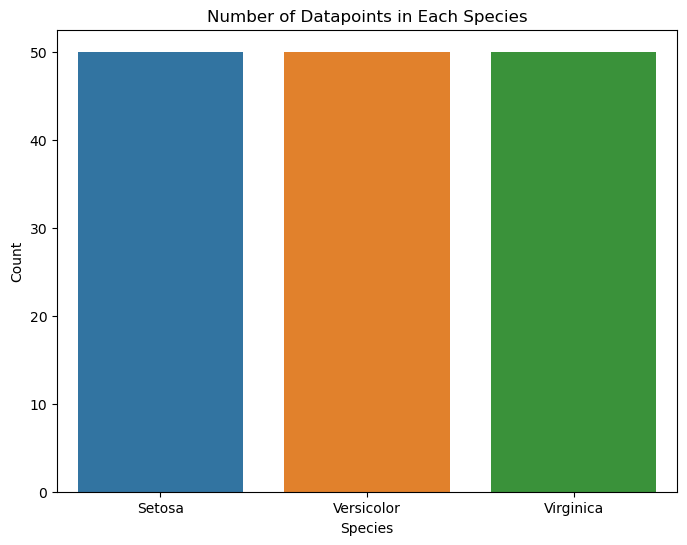

In [11]:
species_counts = df['variety'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=species_counts.index, y=species_counts.values)
plt.title('Number of Datapoints in Each Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

## 2.4 Plot a heatmap and check whether there is a correlation between different numerical features. Also check the correlation of different features with the target feature Species

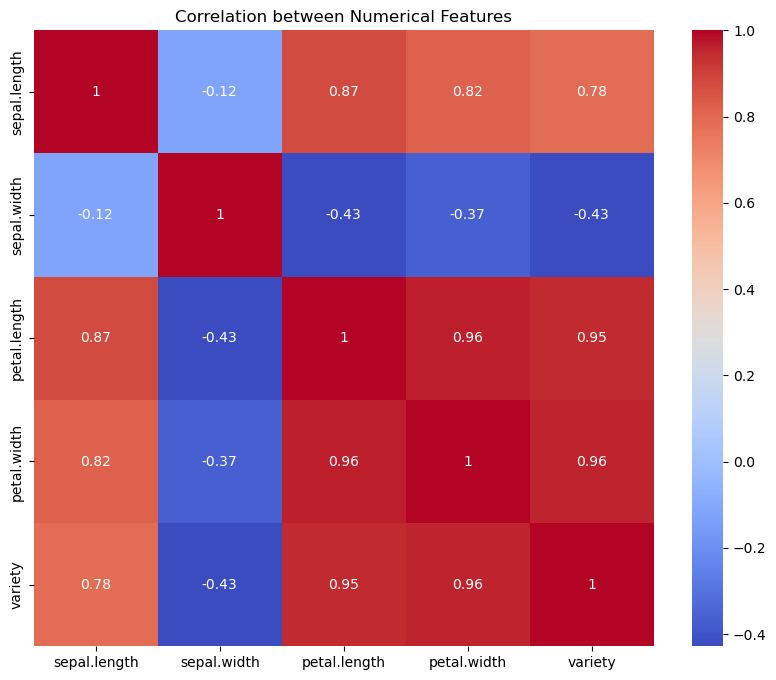

In [12]:
df_encoded = df.copy()
df_encoded['variety'] = df_encoded['variety'].astype('category').cat.codes

# Plot a heatmap for correlation
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Numerical Features')
plt.show()

## 2.5 Plot a pairplot to check the relationship between different predictor features and the target variable. Since there are 4 features you’ll get a graph matrix of size 4x4. Write your observations of the pairplot.

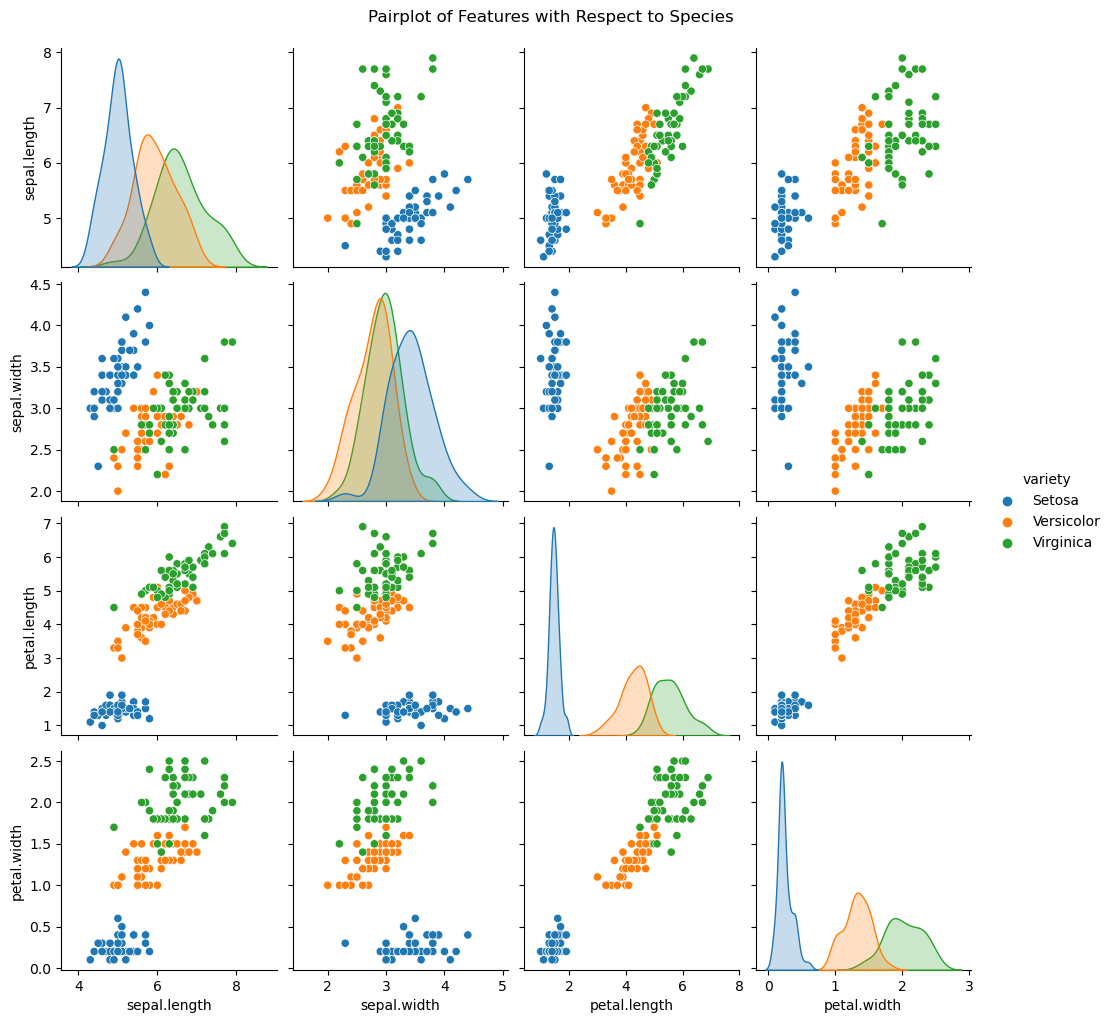

In [13]:
sns.pairplot(df, hue='variety')
plt.suptitle('Pairplot of Features with Respect to Species', y=1.02)
plt.show()

# Section 3- Preprocessing the dataset

## 3.1 Check for NaN values in the dataset

In [15]:
nan_values = df.isna().sum()

## 3.2 Add new features: sepal_area and petal_area

In [16]:
df['sepal_area'] = df['sepal.length'] * df['sepal.width']
df['petal_area'] = df['petal.length'] * df['petal.width']

## 3.3 Encode the categorical variable 'Species' using label_encoder

In [17]:
label_encoder = LabelEncoder()
df['variety_encoded'] = label_encoder.fit_transform(df['variety'])

## Displaying the number of NaN values and the described updated dataframe

In [ ]:
print(nan_values)

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64


In [20]:
print(df.head())

   sepal.length  sepal.width  petal.length  petal.width variety  sepal_area  \
0           5.1          3.5           1.4          0.2  Setosa       17.85   
1           4.9          3.0           1.4          0.2  Setosa       14.70   
2           4.7          3.2           1.3          0.2  Setosa       15.04   
3           4.6          3.1           1.5          0.2  Setosa       14.26   
4           5.0          3.6           1.4          0.2  Setosa       18.00   

   petal_area  variety_encoded  
0        0.28                0  
1        0.28                0  
2        0.26                0  
3        0.30                0  
4        0.28                0  


# Section 4. Splitting the dataset

## 4.1 Store the 'Species' values in 'target' and drop the encoded feature from the dataframe

In [24]:
target = df['variety_encoded']
df = df.drop('variety_encoded', axis=1)

## 4.2 Split the dataframe into X_train, X_test, y_train, and y_test

In [25]:
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

## Displaying the shapes of the splits

In [26]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (120, 7)
X_test shape: (30, 7)
y_train shape: (120,)
y_test shape: (30,)


# Section 5. Perform Hyperparameter Tuning and Training the model

In [34]:
print(df.columns)

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width', 'variety',
       'sepal_area', 'petal_area'],
      dtype='object')


In [35]:
# Encode the 'Species' feature (assuming it's named 'variety' in your dataset)
label_encoder = LabelEncoder()
encoded_target = label_encoder.fit_transform(df['variety'])

## 5.1 Define a Decision tree classifier and perform Grid_Search_CV with the following parameters Criterion = [‘gini’,’entropy’] Max_depth= [2,3,10,15]

In [36]:
# Split the dataset into features and target variable
X = df.drop('variety', axis=1)  # Drop the non-encoded 'variety' column
y = encoded_target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and configure the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 10, 15]
}

# Perform Grid Search
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 10, 15]})

## 5.2 In the previous step you are training 8 models. Plot the scores of all the 8 models using heatmap and select the best set of parameters.
## 5.3 Train your decision tree on the best set of parameters obtained from step 
## 5.3.2 . Calculate accuracy and log loss on train data and test data. Also plot confusion matrix for train and test data.

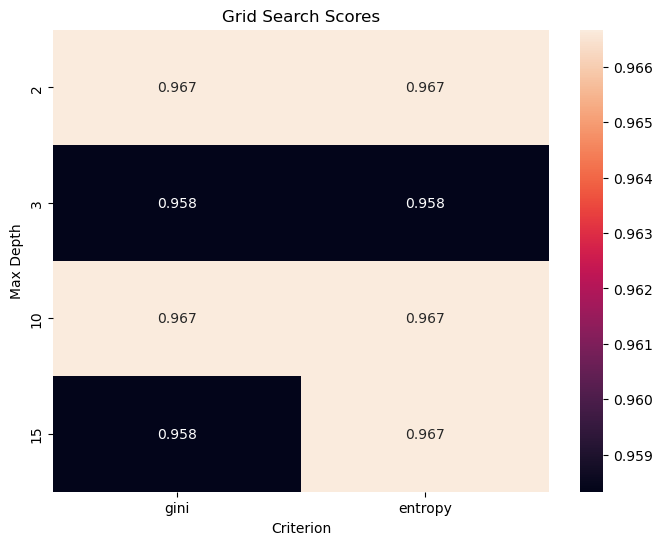

In [37]:
# Plotting the scores of all models using heatmap
scores = grid_search.cv_results_['mean_test_score'].reshape(4, 2)
plt.figure(figsize=(8, 6))
sns.heatmap(scores, annot=True, fmt=".3f", xticklabels=param_grid['criterion'], yticklabels=param_grid['max_depth'])
plt.xlabel('Criterion')
plt.ylabel('Max Depth')
plt.title('Grid Search Scores')
plt.show()

# Train the decision tree on the best set of parameters
best_dt = DecisionTreeClassifier(**grid_search.best_params_)
best_dt.fit(X_train, y_train)

# Calculate accuracy and log loss on train and test data
y_train_pred = best_dt.predict(X_train)
y_test_pred = best_dt.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_log_loss = log_loss(y_train, best_dt.predict_proba(X_train))
test_log_loss = log_loss(y_test, best_dt.predict_proba(X_test))

## 5.4 Use graphviz library to visualize the decision tree.

In [41]:
# Confusion matrices for train and test data
train_confusion_matrix = confusion_matrix(y_train, y_train_pred)
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)

# Visualize the decision tree using graphviz
dot_data = export_graphviz(best_dt, out_file=None, 
                           feature_names=X.columns,  
                           class_names=label_encoder.classes_,
                           filled=True, rounded=True,  
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("/Users/ilaakshmishra/Documents/ArpitJiaji_Assignment/decision_tree")

'/Users/ilaakshmishra/Documents/ArpitJiaji_Assignment/decision_tree.pdf'

# Section 6. Training Random Forest model

## 6.1 Define a Random Forest classifier and Grid_Search_CV with the following parameters N_estimators = 2,30,50,100 Max_depth= 1,2,3,5

In [44]:
rf_param_grid = {
    'n_estimators': [2, 30, 50, 100],
    'max_depth': [1, 2, 3, 5]
}
rf_classifier = RandomForestClassifier()
rf_grid_search = GridSearchCV(rf_classifier, rf_param_grid, cv=5)
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 5],
                         'n_estimators': [2, 30, 50, 100]})

## 6.2 5.2 In the previous step you are training 16 models. Plot the scores of all the 16 models using heatmap and select the best set of parameters.

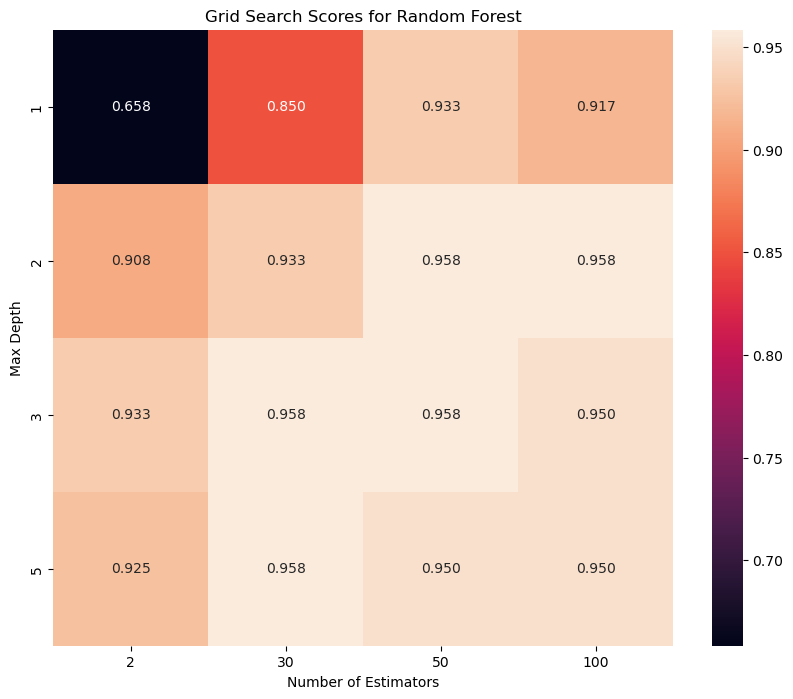

In [45]:
rf_scores = rf_grid_search.cv_results_['mean_test_score'].reshape(4, 4)
plt.figure(figsize=(10, 8))
sns.heatmap(rf_scores, annot=True, fmt=".3f", xticklabels=rf_param_grid['n_estimators'], yticklabels=rf_param_grid['max_depth'])
plt.xlabel('Number of Estimators')
plt.ylabel('Max Depth')
plt.title('Grid Search Scores for Random Forest')
plt.show()

rf_best_params = rf_grid_search.best_params_

## 6.3 Train your Random forest model on the best set of parameters obtained from step 6.2 . Calculate accuracy and log loss on train data and test data. Also plot confusion matrix for train best_rf = RandomForestClassifier(**rf_best_params)

In [46]:
best_rf = RandomForestClassifier(**rf_best_params)
best_rf.fit(X_train, y_train)

# Calculate accuracy and log loss on train and test data
rf_y_train_pred = best_rf.predict(X_train)
rf_y_test_pred = best_rf.predict(X_test)
rf_train_accuracy = accuracy_score(y_train, rf_y_train_pred)
rf_test_accuracy = accuracy_score(y_test, rf_y_test_pred)
rf_train_log_loss = log_loss(y_train, best_rf.predict_proba(X_train))
rf_test_log_loss = log_loss(y_test, best_rf.predict_proba(X_test))

# Confusion matrices for train and test data
rf_train_confusion_matrix = confusion_matrix(y_train, rf_y_train_pred)
rf_test_confusion_matrix = confusion_matrix(y_test, rf_y_test_pred)

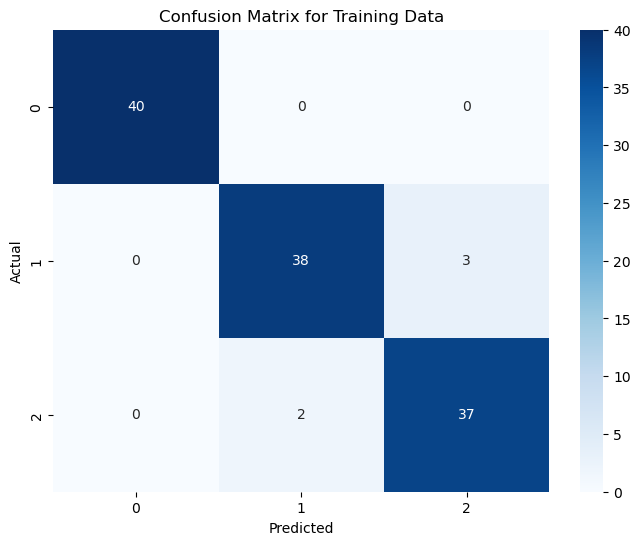

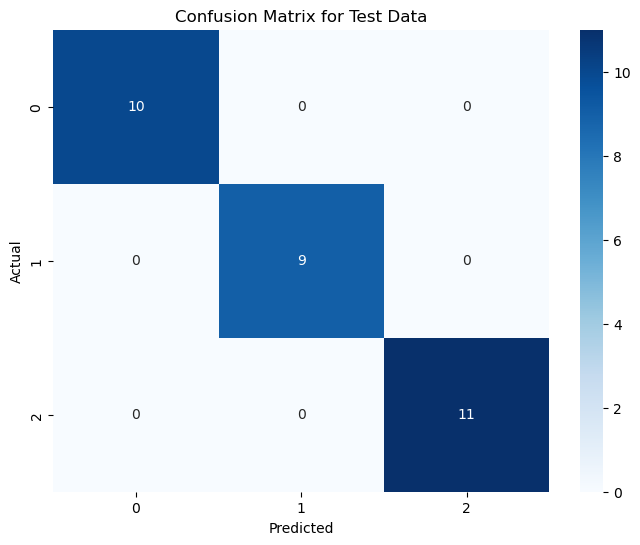

In [55]:
# Predictions for train and test sets
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

# Confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Plotting the confusion matrix for the training data
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Training Data')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Plotting the confusion matrix for the test data
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Test Data')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()